In [29]:
#----------------------------load data----------------------------------

import numpy as np

data = np.load('/home/thanakrit/python/FaceModel/bank_face/FaceRecognition/data/faceImg/fixface02.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

print('Loaded:', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded: (163, 160, 160, 3) (163,) (163, 160, 160, 3) (163,)


In [30]:
#--------------------------- convert color before show --------------------------

import cv2

imgs = list()
for img in trainX:
    im = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    imgs.append(im)

np.asarray(imgs)
print('done')

done


#------------------------------ show one image----------------------------------------
cv2.imshow('dvcasv', imgs[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

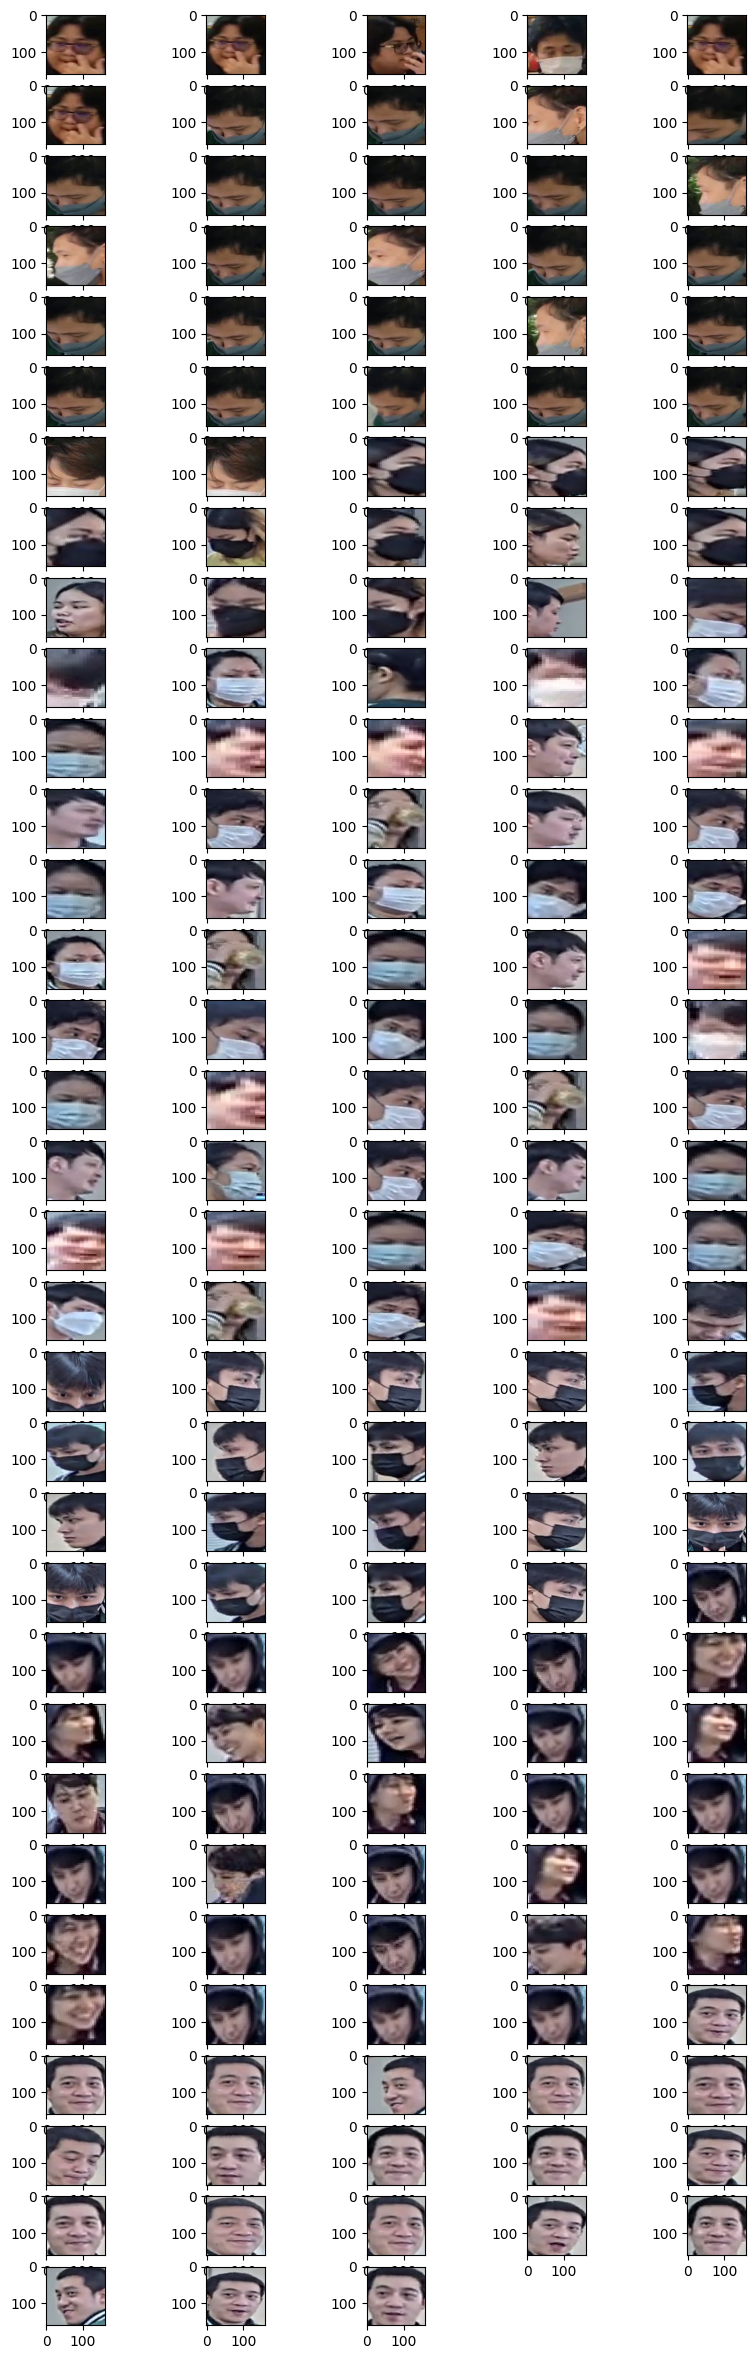

In [31]:
#------------------------  plot images show -----------------------------------

import matplotlib.pyplot as plt

col = 5
fig = plt.figure(figsize=(10, 30))

row = int(round(len(trainX)/col, 0))

for j in range(len(trainy)):
    plt.subplot(row, col, j+1)
    plt.imshow(trainX[j])
    
plt.show()

In [27]:
#-------------------------------load 512faceData ----------------------------------
data = np.load('/home/thanakrit/python/FaceModel/bank_face/checkAndtest/8people512.npz')

X_train, y_train = data['arr_0'], data['arr_1']#, data['arr_2'], data['arr_3']
print('Loaded:', X_train.shape, y_train.shape)

Loaded: (52, 512) (52,)


In [95]:
#------------------------------ make face array data ------------------------------------

from cProfile import label
from random import sample
from statistics import mean
from turtle import width
import numpy as np
from PIL import Image
from mtcnn.mtcnn import MTCNN
from tqdm import tqdm
from os import listdir
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
import cv2


detector = MTCNN()


#directory images for training
root = "/home/thanakrit/python/FaceModel/bank_face/FaceRecognition/images/"

#load image just face and keep into array
def load_face(dir):
    faces = list()
    for filename in tqdm(listdir(dir)):
        path = dir+filename
        print(filename)
        face = extract_face(path)
        faces.append(face)
    return faces

#load output

def load_dataset(dir):
    #list for face and label
    X, y = list(), list()
    for subdir in listdir(dir):
        path = dir+subdir+'/'
        print(subdir)
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        #result
        print("loaded %d sample(s) for class %s" %(len(faces), subdir))
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


def extract_face(filename, required_size=(160, 160), detector=detector):

    image = cv2.imread(filename)
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im_arr = np.array(image_RGB)

    faces = detector.detect_faces(im_arr)
    x1, y1, width, height = faces[0]['box']
    x2, y2 = x1+width, y1+height
    face = im_arr[y1:y2, x1:x2]

    face = cv2.resize(face, required_size, interpolation = cv2.INTER_AREA)
    face = np.array(face)
   
    face_array = np.asarray(face)
    return face_array


if __name__ == '__main__':
    
   
    #load dataset for train
    trainX, trainy = load_dataset(root+'train/')
    print('X shape, y shape:', trainX.shape, trainy.shape)

    #load dataset for validation
    testX, testy = load_dataset(root+'train/') #actually should be val directory

    print('X shape, y shape:', trainX.shape, trainy.shape)

    #save as numpy array file
    #np.savez_compressed('/home/thanakrit/python/FaceModel/bank_face/FaceRecognition/data/faceImg/maskData01.npz', trainX, testy, testX, testy)
   




Unknown


  0%|          | 0/17 [00:00<?, ?it/s]

Bank0.88.jpg
1/1 [==============================] - 0s 80ms/step


  6%|▌         | 1/17 [00:00<00:11,  1.40it/s]

Audd0.74.jpg
1/1 [==============================] - 0s 19ms/step


 12%|█▏        | 2/17 [00:01<00:08,  1.72it/s]

Bank1.00.jpg
1/1 [==============================] - 0s 12ms/step


 18%|█▊        | 3/17 [00:01<00:07,  1.95it/s]

Bank0.72.jpg
1/1 [==============================] - 0s 19ms/step


 24%|██▎       | 4/17 [00:02<00:06,  2.00it/s]

Audd0.88.jpg
1/1 [==============================] - 0s 12ms/step


 29%|██▉       | 5/17 [00:02<00:05,  2.10it/s]

Audd0.89.jpg
1/1 [==============================] - 0s 19ms/step


 35%|███▌      | 6/17 [00:03<00:05,  2.07it/s]

Bank0.71.jpg
1/1 [==============================] - 0s 12ms/step


 41%|████      | 7/17 [00:03<00:04,  2.12it/s]

Bank0.73.jpg
1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 8/17 [00:03<00:04,  2.07it/s]

Bank0.87.jpg
1/1 [==============================] - 0s 11ms/step


 53%|█████▎    | 9/17 [00:04<00:03,  2.14it/s]

Audd0.71.jpg
1/1 [==============================] - 0s 19ms/step


 59%|█████▉    | 10/17 [00:04<00:03,  2.17it/s]

Bank0.96.jpg
1/1 [==============================] - 0s 12ms/step


 65%|██████▍   | 11/17 [00:05<00:02,  2.21it/s]

Audd0.93.jpg
1/1 [==============================] - 0s 12ms/step


 71%|███████   | 12/17 [00:05<00:02,  2.24it/s]

Bank0.85.jpg
1/1 [==============================] - 0s 13ms/step


 76%|███████▋  | 13/17 [00:06<00:01,  2.18it/s]

Bank0.90.jpg
1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 14/17 [00:06<00:01,  2.19it/s]

Bank0.86.jpg
1/1 [==============================] - 0s 12ms/step


 88%|████████▊ | 15/17 [00:07<00:00,  2.18it/s]

Bank0.69.jpg
1/1 [==============================] - 0s 12ms/step


 94%|█████████▍| 16/17 [00:07<00:00,  2.24it/s]

Audd0.72.jpg
1/1 [==============================] - 0s 11ms/step


100%|██████████| 17/17 [00:08<00:00,  2.12it/s]


loaded 17 sample(s) for class Unknown
Porz


  0%|          | 0/2 [00:00<?, ?it/s]

Bank0.74.jpg
1/1 [==============================] - 0s 19ms/step


 50%|█████     | 1/2 [00:00<00:00,  2.29it/s]

Bank0.83.jpg
1/1 [==============================] - 0s 19ms/step


100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


loaded 2 sample(s) for class Porz
May


  0%|          | 0/1 [00:00<?, ?it/s]

Bank0.63.jpg
1/1 [==============================] - 0s 12ms/step


100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


loaded 1 sample(s) for class May
X shape, y shape: (20, 160, 160, 3) (20,)
Unknown


  0%|          | 0/17 [00:00<?, ?it/s]

Bank0.88.jpg
1/1 [==============================] - 0s 13ms/step


  6%|▌         | 1/17 [00:00<00:06,  2.35it/s]

Audd0.74.jpg
1/1 [==============================] - 0s 12ms/step


 12%|█▏        | 2/17 [00:00<00:06,  2.29it/s]

Bank1.00.jpg
1/1 [==============================] - 0s 13ms/step


 18%|█▊        | 3/17 [00:01<00:06,  2.32it/s]

Bank0.72.jpg
1/1 [==============================] - 0s 12ms/step


 24%|██▎       | 4/17 [00:01<00:05,  2.26it/s]

Audd0.88.jpg
1/1 [==============================] - 0s 13ms/step


 29%|██▉       | 5/17 [00:02<00:05,  2.29it/s]

Audd0.89.jpg
1/1 [==============================] - 0s 12ms/step


 35%|███▌      | 6/17 [00:02<00:04,  2.29it/s]

Bank0.71.jpg
1/1 [==============================] - 0s 11ms/step


 41%|████      | 7/17 [00:03<00:04,  2.25it/s]

Bank0.73.jpg
1/1 [==============================] - 0s 12ms/step


 47%|████▋     | 8/17 [00:03<00:04,  2.24it/s]

Bank0.87.jpg
1/1 [==============================] - 0s 11ms/step


 53%|█████▎    | 9/17 [00:04<00:03,  2.19it/s]

Audd0.71.jpg
1/1 [==============================] - 0s 11ms/step


 59%|█████▉    | 10/17 [00:04<00:03,  2.22it/s]

Bank0.96.jpg
1/1 [==============================] - 0s 11ms/step


 65%|██████▍   | 11/17 [00:04<00:02,  2.22it/s]

Audd0.93.jpg
1/1 [==============================] - 0s 12ms/step


 71%|███████   | 12/17 [00:05<00:02,  2.26it/s]

Bank0.85.jpg
1/1 [==============================] - 0s 12ms/step


 76%|███████▋  | 13/17 [00:05<00:01,  2.21it/s]

Bank0.90.jpg
1/1 [==============================] - 0s 12ms/step


 82%|████████▏ | 14/17 [00:06<00:01,  2.25it/s]

Bank0.86.jpg
1/1 [==============================] - 0s 13ms/step


 88%|████████▊ | 15/17 [00:06<00:00,  2.28it/s]

Bank0.69.jpg
1/1 [==============================] - 0s 12ms/step


 94%|█████████▍| 16/17 [00:07<00:00,  2.24it/s]

Audd0.72.jpg
1/1 [==============================] - 0s 12ms/step


100%|██████████| 17/17 [00:07<00:00,  2.25it/s]


loaded 17 sample(s) for class Unknown
Porz


  0%|          | 0/2 [00:00<?, ?it/s]

Bank0.74.jpg
1/1 [==============================] - 0s 12ms/step


 50%|█████     | 1/2 [00:00<00:00,  2.21it/s]

Bank0.83.jpg
1/1 [==============================] - 0s 12ms/step


100%|██████████| 2/2 [00:00<00:00,  2.30it/s]


loaded 2 sample(s) for class Porz
May


  0%|          | 0/1 [00:00<?, ?it/s]

Bank0.63.jpg
1/1 [==============================] - 0s 12ms/step


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

loaded 1 sample(s) for class May
X shape, y shape: (20, 160, 160, 3) (20,)


In [28]:
#----------------------------- convert faceData to 512 ---------------------------------

from keras_facenet import FaceNet
import numpy as np

facenet_model = FaceNet()


if __name__ == '__main__':

    #load data 
    data = np.load('./dataRama/faceImg/rama17.npz')
    trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    print('Loaded:', trainX.shape, trainy.shape, testX.shape, testy.shape)

    #finding face embeding512
    facenet_model = FaceNet()

    #train
    emdTrainX = list()
    for face in trainX:

        face = np.expand_dims(face, axis=0)
        emd = facenet_model.embeddings(face)[0]
        emdTrainX.append(emd)
    
    emdTrainX = np.asarray(emdTrainX)
    print('Train Embeding shape', emdTrainX.shape)

    #validation
    emdTestX = list()
    for face in testX:
        face = np.expand_dims(face, axis=0)
        emd = facenet_model.embeddings(face)[0]
        emdTestX.append(emd)
    emdTestX = np.asarray(emdTestX)
    
    #save faceData512
    np.savez_compressed('./dataRama/face512/512rama17.npz', emdTrainX, trainy, emdTestX, testy)
    print('save done')
    

Loaded: (27, 160, 160, 3) (27,) (27, 160, 160, 3) (27,)
1/1 [==============================] - 0s 22ms/step
Train Embeding shape (27, 512)
1/1 [==============================] - 0s 22ms/step
save done


In [1]:
#-----------------------------load 512faceData ------------------------------------

import numpy as np

#load data
data = np.load('./data/face512/512normal.npz')
trainX, trainy = data['arr_0'], data['arr_1']


from sklearn.preprocessing import LabelEncoder

#make output to one hot encoder
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
trainy_enc

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 397 samples in 0.001s...
[t-SNE] Computed neighbors for 397 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 397 / 397
[t-SNE] Mean sigma: 0.323608
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.707855
[t-SNE] KL divergence after 1000 iterations: 0.155670


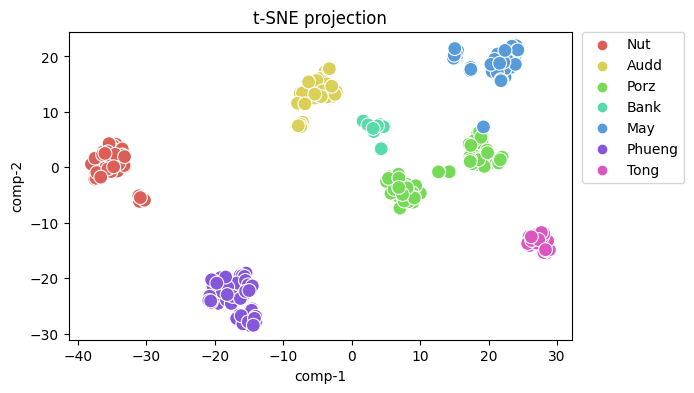

In [3]:
#---------------------------------plot graph of face data--------------------------------

from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

n_classes = len(np.unique(trainy_enc))
y_train = trainy_enc

x_mnist  = trainX


tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)

df = pd.DataFrame()
df["y"] = y_train
df['y_cls'] = trainy
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

plt.figure(figsize=(6.5, 4))
sns.scatterplot(x="comp-1", y="comp-2", s=100, hue=df.y_cls.tolist(), palette=sns.color_palette("hls", n_classes), 
                data = df).set(title="t-SNE projection")

plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()


#-------------------------------------------- train 2d model -------------------------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#one hot encoding
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)

from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(categories))

y_train_1h = one_hot_encode(trainy_enc).astype('int')


#create model 
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(2,)))
model.add(Dense(len(y_train_1h[0]), activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

histoty = model.fit(z, y_train_1h, epochs=1000, batch_size=2048, verbose=1, validation_data=(z, y_train_1h))

score = model.evaluate(z, y_train_1h, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

class Onehot2Int(object):
    def __init__(self, model):
        self.model = model
    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
    
model_no_ohe = Onehot2Int(model)

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))

plot_decision_regions(z, np.array(trainy_enc), clf=model_no_ohe, legend=2)

plt.title('MLP: {} Classes (hidden layer:{})'.format(len(np.unique(trainy)), 128))
plt.xticks([])
plt.yticks([])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#---------------------------------- 2dModel -------------------------------------------

model.save('data/model_h5/2dModel.h5')

In [18]:
#----------------------------------- train model -------------------------------------

from statistics import mode
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

import numpy as np


#load 512face data
data = np.load('./dataRama/face512/512ramaAll.npz')
trainX, trainy = data['arr_0'], data['arr_1']
#print('Loaded:', trainX.shape, trainy.shape, testX.shape, testy.shape)


#one hot encoding
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)

from tensorflow.keras.utils import to_categorical

def one_hot_encode(arr):
    categories, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(categories))

y_train_1h = one_hot_encode(trainy_enc).astype('int')


#create model 
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(512,)))
model.add(Dropout(0.8))
model.add(Dense(len(y_train_1h[0]), activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

histoty = model.fit(trainX, y_train_1h, epochs=200, batch_size=2048, verbose=1, validation_data=(trainX, y_train_1h))

score = model.evaluate(trainX, y_train_1h, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

model.save('./dataRama/model_h5/rama03.h5')



Epoch 1/200
10/10 [==============================] - 1s 46ms/step - loss: 7.2469 - accuracy: 0.0014 - val_loss: 7.2402 - val_accuracy: 0.0059
Epoch 2/200
10/10 [==============================] - 0s 17ms/step - loss: 7.2346 - accuracy: 0.0038 - val_loss: 7.2223 - val_accuracy: 0.0116
Epoch 3/200
10/10 [==============================] - 0s 17ms/step - loss: 7.2129 - accuracy: 0.0054 - val_loss: 7.1899 - val_accuracy: 0.0093
Epoch 4/200
10/10 [==============================] - 0s 17ms/step - loss: 7.1747 - accuracy: 0.0049 - val_loss: 7.1400 - val_accuracy: 0.0103
Epoch 5/200
10/10 [==============================] - 0s 17ms/step - loss: 7.1229 - accuracy: 0.0068 - val_loss: 7.0719 - val_accuracy: 0.0103
Epoch 6/200
10/10 [==============================] - 0s 17ms/step - loss: 7.0607 - accuracy: 0.0073 - val_loss: 6.9894 - val_accuracy: 0.0108
Epoch 7/200
10/10 [==============================] - 0s 17ms/step - loss: 6.9845 - accuracy: 0.0085 - val_loss: 6.8967 - val_accuracy: 0.0146
Epoch 

10/10 [==============================] - 0s 17ms/step - loss: 4.0173 - accuracy: 0.1482 - val_loss: 1.5741 - val_accuracy: 0.9454
Epoch 116/200
10/10 [==============================] - 0s 17ms/step - loss: 3.9898 - accuracy: 0.1537 - val_loss: 1.5597 - val_accuracy: 0.9464
Epoch 117/200
10/10 [==============================] - 0s 17ms/step - loss: 3.9972 - accuracy: 0.1513 - val_loss: 1.5447 - val_accuracy: 0.9468
Epoch 118/200
10/10 [==============================] - 0s 17ms/step - loss: 3.9859 - accuracy: 0.1501 - val_loss: 1.5320 - val_accuracy: 0.9474
Epoch 119/200
10/10 [==============================] - 0s 17ms/step - loss: 3.9952 - accuracy: 0.1453 - val_loss: 1.5225 - val_accuracy: 0.9474
Epoch 120/200
10/10 [==============================] - 0s 17ms/step - loss: 4.0082 - accuracy: 0.1518 - val_loss: 1.5116 - val_accuracy: 0.9478
Epoch 121/200
10/10 [==============================] - 0s 17ms/step - loss: 3.9758 - accuracy: 0.1480 - val_loss: 1.5013 - val_accuracy: 0.9487
Epoch 

Epoch 172/200
10/10 [==============================] - 0s 17ms/step - loss: 3.8155 - accuracy: 0.1678 - val_loss: 1.0799 - val_accuracy: 0.9635
Epoch 173/200
10/10 [==============================] - 0s 17ms/step - loss: 3.8174 - accuracy: 0.1700 - val_loss: 1.0744 - val_accuracy: 0.9636
Epoch 174/200
10/10 [==============================] - 0s 17ms/step - loss: 3.8150 - accuracy: 0.1696 - val_loss: 1.0664 - val_accuracy: 0.9639
Epoch 175/200
10/10 [==============================] - 0s 17ms/step - loss: 3.8178 - accuracy: 0.1681 - val_loss: 1.0601 - val_accuracy: 0.9635
Epoch 176/200
10/10 [==============================] - 0s 17ms/step - loss: 3.7913 - accuracy: 0.1675 - val_loss: 1.0512 - val_accuracy: 0.9641
Epoch 177/200
10/10 [==============================] - 0s 17ms/step - loss: 3.7980 - accuracy: 0.1724 - val_loss: 1.0450 - val_accuracy: 0.9643
Epoch 178/200
10/10 [==============================] - 0s 17ms/step - loss: 3.8009 - accuracy: 0.1682 - val_loss: 1.0383 - val_accuracy:

In [6]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1407)              91455     
                                                                 
Total params: 124,287
Trainable params: 124,287
Non-trainable params: 0
_________________________________________________________________


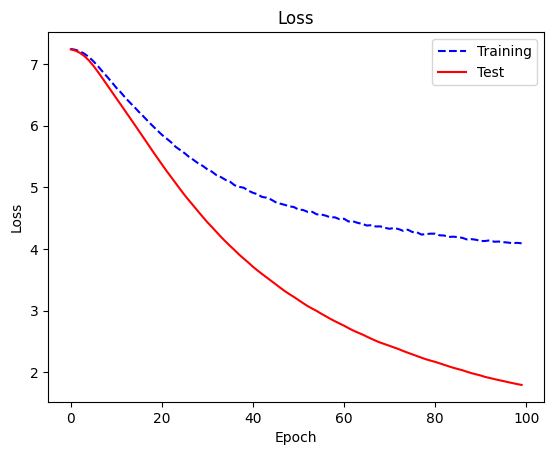

In [7]:
#--------------------------- plot training grph ----------------------------------

import pandas as pd
import matplotlib.pyplot as plt

df_hist = pd.DataFrame.from_dict(histoty.history)
df_hist['loss'].plot(style='b--', label='Training')
df_hist['val_loss'].plot(style='r-', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


In [5]:
# ----------------------------- Run Python -------------------------------

import imghdr
from operator import le
from tabnanny import verbose
from tracemalloc import start
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
from yoloface import face_analysis

import time


#face data in model
data = np.load('./dataRama/face512/512ramaAll.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
#print('Loaded:', trainX.shape, trainy.shape, testX.shape, testy.shape)


#load model
model = load_model('dataRama/model_h5/rama03.h5')
#model.summary() #show model 


#instand of FaceNet
facenet_model = FaceNet()
yoloface = face_analysis()

#class name
class_name = np.unique(trainy)


def crop_facesTolist(faces, image):

    faces_list = list()
    face_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for face in faces:
        mini_face = face_rgb[face[1]:face[1]+face[2], face[0]:face[0]+face[3]]
        face = cv2.resize(mini_face, (160,160), interpolation = cv2.INTER_AREA)
        face = np.array(face)
        faces_list.append(face)
    
    faces_list = np.asarray(faces_list)
    return faces_list


def class_num_conf(results):
    conf_list = list()
    class_num = np.argmax(results, axis=1)

    for result in results:

        conf = np.max(result)
        conf_list.append(conf)

    return class_num, conf_list


def resize_frame(frame, size):
    w = int((frame.shape[1]*size))  
    h = int((frame.shape[0]*size))               
    return cv2.resize(frame, (w, h), interpolation = cv2.INTER_AREA)



def intit_tf():
    #a = facenet_model.embeddings(np.expand_dims(testX[0], axis=0))
    
    model.predict(np.expand_dims(testX[0], axis=0))
    print("--------------Tensorflow is ready------------------")


def yoloSizeTo(faces, sizeHaar, size):

    new_faces = list()

    for face in faces:
        x, y, w, h = face
        x, y, w, h = 0 if x < 0 else x, 0 if y < 0 else y, 0 if w < 0 else w, 0 if h < 0 else h 
        x, y, w, h = int(x*(size/sizeHaar)), int(y*(size/sizeHaar)), int(w*(size/sizeHaar)), int(h*(size/sizeHaar))
        new_faces.append((x,y,w,h))

    return np.asarray(new_faces)


def draw_bbox(frame, pos, text,color):
    size_text = 0.8
    x, y, w, h = pos[0], pos[1], pos[3], pos[2]
    cv2.putText(frame,text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 
                            size_text, color, 2, cv2.LINE_AA)
    cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)



faces_pos = []

#color
red = (0, 0, 255)
blue = (255, 0, 0)
green = (0, 255, 0)

#parameter
confident = .8

#loop detect
count_loop = 0

count_loop_max = 1

#record
rec = False

#scale
size_img_yolo = 1
size_img_show = 0.5
# sort_frame = 'faceVideo/Pporz.mp4'
sort_frame = 'rtsp://192.168.7.80:554/axis-media/media.amp'

#path save img
path_save_img = "images/result/18_10_2022/"
path_save_cam = "images/result/camImg/"

#threshold of brounding box width and height to predict
th_w_min = 20
th_w_max = 40

th_h_min = 20
th_h_max = 40

#confident if brounding box is small but high confident
conf_mini = 91

idf = 0



start_t = time.time()


if __name__ == "__main__":
    
    #innit tensorflow
    intit_tf()

    cap = cv2.VideoCapture(sort_frame)

    if not cap.isOpened():
        print("Can't open")
        cap.release()


    while True:

        ret, frame = cap.read()


        #if can read image ret return ture
        if ret:
            #resize
            frame_yolo = resize_frame(frame, size_img_yolo)
            frame_show = resize_frame(frame, size_img_show)

            if count_loop == count_loop_max: 
    

                #for frame detect face 
                ret1, faces_pos, confface = yoloface.face_detection(frame_arr=frame_yolo,frame_status=True,model='tiny')

                new_faces_pos = yoloSizeTo(faces_pos, size_img_yolo, 1)
                show_faces_pos = yoloSizeTo(faces_pos, size_img_yolo, size_img_show)

                if faces_pos != []:
                    
                    #crop just face 
                    faces_list = crop_facesTolist(new_faces_pos, frame)

                    #FaceNet
                    feature512 = facenet_model.embeddings(faces_list)

                    #NN model
                    results = model.predict(feature512)

                    #finding class number and confident

                    class_num, conf = class_num_conf(results)
                    

                    #draw brounding box
                    for i in range(len(class_num)):
            
                        condi_a = (conf[i] > confident) and  (show_faces_pos[i][2] >= th_w_max) and (show_faces_pos[i][3] >= th_h_max)
                        condi_b = conf[i] > conf_mini and th_w_min < show_faces_pos[i][2] < th_w_max and th_h_min < show_faces_pos[i][3] < th_h_max
                        
                       
                        if conf[i] > confident and class_name[class_num[i]] != "Unknown":
                            draw_bbox(frame_show, show_faces_pos[i], "{} {:.2f}".format(class_name[class_num[i]], conf[i]), blue)     
                            
                            if rec is True and class_name[class_num[i]]:
                                cv2.imwrite(path_save_img+"{}{} ({:.2f}).jpg".format(idf,class_name[class_num[i]],conf[i]), frame_show)
                                #cv2.imwrite(path_save_cam+"{}{} ({:.2f}).jpg".format(idf,class_name[class_num[i]],conf[i]), frame_yolo)
                                idf += 1
                                
                            print(class_name[class_num[i]], conf[i])
                        
                        else:
                            draw_bbox(frame_show, show_faces_pos[i], "Unknown",red)
                            
                            
                            if rec is True:
                                cv2.imwrite(path_save_img+"{}{} ({:.2f}).jpg".format(idf,class_name[class_num[i]],conf[i]), frame_show)
                                #cv2.imwrite(path_save_cam+"{}{} ({:.2f}).jpg".format(idf,class_name[class_num[i]],conf[i]), frame_yolo)
                                idf += 1
                                
            else:
                if faces_pos != []:
                    #draw brounding box
                    for i in range(len(class_num)):
                        condi_a = (conf[i] > confident) and  (show_faces_pos[i][2] >= th_w_max) and (show_faces_pos[i][3] >= th_h_max)
                       
                        if conf[i] > confident and class_name[class_num[i]] != "Unknown":
                            
                            draw_bbox(frame_show, show_faces_pos[i], "{} {:.2f}".format(class_name[class_num[i]], conf[i]), blue)
                        else:
                            draw_bbox(frame_show, show_faces_pos[i], "Unknown", red)


            if count_loop == count_loop_max:
                count_loop = 0
            else:
                count_loop += 1
                    

            #show frame
            cv2.imshow('MyFaceNet', frame_show)

            #wait for press ESC to exit
            if cv2.waitKey(1) == 27:
                break
        
        #break loop if ret is not ture
        else:
            break
        
    #close camera
    cap.release()
    cv2.destroyAllWindows() #close window

    end = time.time()
    print("time is :", end-start_t)

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists
1/1 [==============================] - 0s 30ms/step
--------------Tensorflow is ready------------------
1/1 [==============================] - 0s 12ms/step
time is : 11.377606630325317


In [17]:
# ------------------------------------test image frame process -------------------------------------

import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras_facenet import FaceNet
#from yoloface import face_analysis


#create instand
facenet_model = FaceNet()
#yoloface = face_analysis()


#load data 
data = np.load('./dataRama/face512/512ramaAll.npz')
trainX, trainy, testmX, testm = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']


#load test data
data = np.load('./dataRama/faceImg/rama005.npz')
testX, testy, testnX, testny = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']


#load model
model = load_model('dataRama/model_h5/rama03.h5')


def class_num_conf(results):
    conf_list = list()
    class_num = np.argmax(results, axis=1)

    for result in results:

        conf = np.max(result)
        conf_list.append(conf)

    return class_num, conf_list



def main():
    #for frame detect face 
    #ret1, faces_pos, confface = yoloface.face_detection(frame_arr=frame_yolo,frame_status=True,model='tiny')
    
    for i in range(len(trainy)):
        
        feature512 = facenet_model.embeddings(np.expand_dims(testX[i-1], axis=0))
    
        results = model.predict(feature512)
    
        class_num, conf = class_num_conf(results)
    
        print(class_name[class_num], conf,  testy[i-1])
    
    


#class name
class_name = np.unique(trainy)


if __name__ == "__main__":
    
    main()
    


1/1 [==============================] - 0s 29ms/step
['005552'] [0.31532007] 005552
1/1 [==============================] - 0s 12ms/step
['005486'] [0.21388319] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.19114228] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.1640657] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.12942135] 005486
1/1 [==============================] - 0s 15ms/step
['005486'] [0.17120855] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.23156078] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.2803729] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.25596902] 005486
1/1 [==============================] - 0s 11ms/step
['005486'] [0.27040797] 005486
1/1 [==============================] - 0s 12ms/step
['005486'] [0.2891961] 005486
1/1 [==============================] - 0s 12ms/step
['022463'] [0.07363874] 005486
1/1 [==

['005261'] [0.25429317] 005261
1/1 [==============================] - 0s 12ms/step
['005261'] [0.19295888] 005261
1/1 [==============================] - 0s 12ms/step
['005261'] [0.42870355] 005261
1/1 [==============================] - 0s 12ms/step
['005261'] [0.27427214] 005261
1/1 [==============================] - 0s 13ms/step
['005261'] [0.40349093] 005261
1/1 [==============================] - 0s 11ms/step
['005261'] [0.27951628] 005261
1/1 [==============================] - 0s 11ms/step
['005261'] [0.26601043] 005261
1/1 [==============================] - 0s 12ms/step
['005261'] [0.42429936] 005261
1/1 [==============================] - 0s 12ms/step
['005261'] [0.43053797] 005261
1/1 [==============================] - 0s 12ms/step
['005261'] [0.13447662] 005261
1/1 [==============================] - 0s 12ms/step
['005162'] [0.11757502] 005162
1/1 [==============================] - 0s 13ms/step
['005162'] [0.11685617] 005162
1/1 [==============================] - 0s 12ms/step
['00

1/1 [==============================] - 0s 12ms/step
['005373'] [0.11251146] 005373
1/1 [==============================] - 0s 12ms/step
['005373'] [0.055758033] 005373
1/1 [==============================] - 0s 11ms/step
['005373'] [0.1072164] 005373
1/1 [==============================] - 0s 12ms/step
['005373'] [0.17403] 005373
1/1 [==============================] - 0s 12ms/step
['005373'] [0.21350515] 005373
1/1 [==============================] - 0s 11ms/step
['005373'] [0.06418866] 005373
1/1 [==============================] - 0s 11ms/step
['005373'] [0.25802004] 005373
1/1 [==============================] - 0s 11ms/step
['005077'] [0.18471904] 005077
1/1 [==============================] - 0s 12ms/step
['005077'] [0.17919722] 005077
1/1 [==============================] - 0s 11ms/step
['005077'] [0.2197092] 005077
1/1 [==============================] - 0s 12ms/step
['005077'] [0.1511554] 005077
1/1 [==============================] - 0s 12ms/step
['005077'] [0.25608823] 005077
1/1 [====

IndexError: index 231 is out of bounds for axis 0 with size 231

In [55]:
#load 512face data
data = np.load('/home/thanakrit/python/FaceModel/bank_face/checkAndtest/pompam512.npz')
trainX, trainy = data['arr_0'], data['arr_1']

data = np.load('/home/thanakrit/python/FaceModel/bank_face/checkAndtest/512myTest01.npz')
train8X, train8y = data['arr_0'], data['arr_1']

In [39]:
print(trainy)
print(len(trainy))
for i, n in enumerate(trainy):
    if n == "Pompam":
        print(trainX[i][55], trainy[i])

['Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam'
 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam'
 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam' 'Pompam'
 'Pompam' 'Pompam' 'May' 'May' 'May' 'May' 'May']
31
0.0282857 Pompam
0.0027151327 Pompam
-0.016029425 Pompam
-0.006139738 Pompam
-0.010644815 Pompam
-0.0035354968 Pompam
-0.047405977 Pompam
0.044120982 Pompam
-0.0021015406 Pompam
0.03762379 Pompam
0.080093354 Pompam
-0.0060888994 Pompam
0.047476906 Pompam
0.050735053 Pompam
0.046946038 Pompam
-0.047921907 Pompam
0.03650968 Pompam
-0.00810633 Pompam
0.021767149 Pompam
0.02133041 Pompam
0.029955707 Pompam
0.037248757 Pompam
0.018562792 Pompam
0.01697387 Pompam
0.06541447 Pompam
0.02524709 Pompam


In [100]:
np.savez_compressed('data/faceImg/fixface01.npz', trainX, trainy, trainX, trainy)

In [ ]:
#-----------------------------หาค่าความคล้ายของใบหน้า--------------------------------

def euclideanDistance(source_represent, test_represent):
    el_dis = source_represent-test_represent
    el_dis = np.sum(np.multiply(el_dis, el_dis))
    el_dis = np.sqrt(el_dis)
    return el_dis


print(trainy[10])
print(trainy[27])

for n, data in enumerate(trainX):
    print(euclideanDistance(data, trainX[2]), "n is:", n)
    
    
